# Computer Vision in Histology - Data Exploration & Preparation

______________________
**Project Title:** Tissue Classification VGG16

**Program:** MSc. Applied Information & Data Science

**Supervisor:** Dr. Umberto Michelucci & Dr. Mirko Birbaumer

**Authors:** Manuel Frei & Anna-Lena Klaus

**Date:** 30.03.2023

## Project Introduction

This projects includes the classification of tissues based on the Histology MNIST dataset (source). As a first step, a simple base model was built to use as a comparable tool while using the transfermodel MobileNetV2 for the tissue classification. 

>[Computer Vision in Histology - Data Exploration & Preparation](#scrollTo=_mPbmTaj4hF1)

>>[Project Introduction](#scrollTo=ov-LYCkJt9O9)

>>[Background & Data](#scrollTo=fYRjaprTR2Xs)

>>>[About Dataset](#scrollTo=fYRjaprTR2Xs)

>>>[Challgenges](#scrollTo=fYRjaprTR2Xs)

>>[Importing Dependencies](#scrollTo=FxyiK1nATtzq)

>>[Loading Data](#scrollTo=zyJ7_Dm-4hF-)

>>[Checking Data Frame](#scrollTo=UQm-a-ukUgGb)

>>[Checking Tissue Classes](#scrollTo=4w6bglzGWP4i)

>>[Reading Tissue Images](#scrollTo=OOT_jRyZXPEb)

>>[Image intensity distributino per class](#scrollTo=lnWF80WEzgG1)

>>[Preparing Data](#scrollTo=DUWYXfQ74hGP)

>>[Saving Data](#scrollTo=eFxYYzwqf8M5)



## Background & Data

### About Dataset

Multiclass classification of histological H&E images of of human colorectal cancer into 8 classes of tissue types:
- TUMOR: Tumour epithelium

- STROMA: Simple stroma (homogeneous composition, includes tumour stroma, extra-tumoural stroma and smooth muscle)

- COMPLEX: Complex stroma (containing single tumour cells and/or few immune cells)

- LYMPHO: Immune cells (including immune-cell conglomerates and sub-mucosal lymphoid follicles)

- DEBRIS: Debris (including necrosis, hemorrhage and mucus)

- MUCOSA: Normal mucosal glands

- ADIPOSE: Adipose tissue

- EMPTY: Background (no tissue)

The dataset contains 5000 images with 625 images for each class. All the images are 150x150px in RGB mode.

Here is a panel of representative images from each class:

The dataset focuses on histology tiles from patients with colorectal cancer. It is built up with eight different classes of tissue.

Source: 
- https://www.tensorflow.org/datasets/catalog/colorectal_histology
- https://github.com/xiey1/Colorectal_Histology_MNIST

### Challgenges

As described in the project introduction, this data_modelling_notebook includes two problems:
- Tissue Classification

The classification problem uses its own base models as a comparable tool for validation reasons.


## Importing Dependencies

As a first step, the required libraries for data preparation are imported the notebook is mounted with Google Drive to retrieve the data. 

In [ ]:
# import dependencies
import os
import random
import pandas as pd
import cv2
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.preprocessing import image

In [ ]:
# mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading Data

As a first step, the data is loaded and information is extracted from the file naming. The data is then stored in a data frame. 

In [ ]:
# import file names into dataframe
from glob import glob
base_dir = '../VGG16/data/Kather_texture_2016_image_tiles_5000'

df = pd.DataFrame({'path': glob(os.path.join(base_dir, '*','*.tif'))})

In [ ]:
# create necessary columns derived from the file naming
df['file_id'] = df['path'].map(lambda x: os.path.splitext(os.path.basename(x))[0])
df['cell_type'] = df['path'].map(lambda x: os.path.basename(os.path.dirname(x)))
df['cell_type_idx'] = df['cell_type'].map(lambda x: int(x.split('_')[0]))
df['cell_type'] = df['cell_type'].map(lambda x: x.split('_')[1])
df['full_image_name'] = df['file_id'].map(lambda x: x.split('_Row')[0])
df['full_image_row'] = df['file_id'].map(lambda x: int(x.split('_')[-3]))
df['full_image_col'] = df['file_id'].map(lambda x: int(x.split('_')[-1]))

## Checking Data Frame

After the data is loaded, the data frame is checked regarding basic information and descriptive statistics.

In [ ]:
# check head of the data frame
df.head()

path  \
0  /content/drive/MyDrive/HSLU_CV/Project/data/Ka...   
1  /content/drive/MyDrive/HSLU_CV/Project/data/Ka...   
2  /content/drive/MyDrive/HSLU_CV/Project/data/Ka...   
3  /content/drive/MyDrive/HSLU_CV/Project/data/Ka...   
4  /content/drive/MyDrive/HSLU_CV/Project/data/Ka...   

                                          file_id cell_type  cell_type_idx  \
0   10AE3_CRC-Prim-HE-06_005.tif_Row_1051_Col_301     EMPTY              8   
1      10D6_CRC-Prim-HE-06_005.tif_Row_1_Col_6451     EMPTY              8   
2  103DB_CRC-Prim-HE-06_005.tif_Row_1651_Col_6751     EMPTY              8   
3  10015_CRC-Prim-HE-06_005.tif_Row_4651_Col_1501     EMPTY              8   
4  1058B_CRC-Prim-HE-06_005.tif_Row_1501_Col_4951     EMPTY              8   

                full_image_name  full_image_row  full_image_col  
0  10AE3_CRC-Prim-HE-06_005.tif            1051             301  
1   10D6_CRC-Prim-HE-06_005.tif               1            6451  
2  103DB_CRC-Prim-HE-06_005.tif            1651            6751  
3  10015_CRC-Prim-HE-06_005.tif            4651            1501  
4  1058B_CRC-Prim-HE-06_005.tif            1501            4951

In [ ]:
# check the summary of the data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   path             5000 non-null   object
 1   file_id          5000 non-null   object
 2   cell_type        5000 non-null   object
 3   cell_type_idx    5000 non-null   int64 
 4   full_image_name  5000 non-null   object
 5   full_image_row   5000 non-null   int64 
 6   full_image_col   5000 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 273.6+ KB


In [ ]:
# check descriptive statistics for numeric columns
df.describe()

cell_type_idx  full_image_row  full_image_col
count    5000.000000     5000.000000     5000.000000
mean        4.500000      924.760000     1113.700000
std         2.291517     1257.158921     1575.909391
min         1.000000        1.000000        1.000000
25%         2.750000      151.000000      151.000000
50%         4.500000      451.000000      451.000000
75%         6.250000     1201.000000     1351.000000
max         8.000000     6451.000000     8101.000000

In [ ]:
# check descriptive statistics for categorical columns
df.describe(include=[object])

path  \
count                                                5000   
unique                                               5000   
top     /content/drive/MyDrive/HSLU_CV/Project/data/Ka...   
freq                                                    1   

                                              file_id cell_type  \
count                                            5000      5000   
unique                                           5000         8   
top     10AE3_CRC-Prim-HE-06_005.tif_Row_1051_Col_301     EMPTY   
freq                                                1       625   

                     full_image_name  
count                           5000  
unique                          4995  
top     1411C_CRC-Prim-HE-06_005.tif  
freq                               2

In [ ]:
# check the duplicates (5 in total - can ignore them)
df['full_image_name'][df.duplicated('full_image_name')]

547     14AD7_CRC-Prim-HE-06_005.tif
552     1411C_CRC-Prim-HE-06_005.tif
582     140E1_CRC-Prim-HE-06_005.tif
3036    16193_CRC-Prim-HE-05_032.tif
3245    15EA0_CRC-Prim-HE-01_013.tif
Name: full_image_name, dtype: object

## Checking Tissue Classes

At this point, the tissue classes are checked in more detail since that is our target variable for the later classification task. 

In [ ]:
# check the naming of the tissue classes
df['cell_type'].unique()

array(['EMPTY', 'TUMOR', 'COMPLEX', 'MUCOSA', 'ADIPOSE', 'LYMPHO',
       'STROMA', 'DEBRIS'], dtype=object)

In [ ]:
# check the entries per tissue class
df['cell_type'].value_counts()

EMPTY      625
TUMOR      625
COMPLEX    625
MUCOSA     625
ADIPOSE    625
LYMPHO     625
STROMA     625
DEBRIS     625
Name: cell_type, dtype: int64

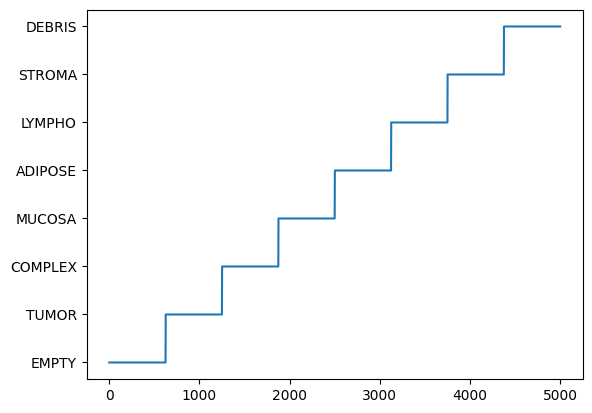

In [ ]:
# check how the data is ordered according to the tissue classes
plt.plot(df.index, df['cell_type'])
plt.show()

In [ ]:
df['cell_type'].isnull().values.any()

False

In [ ]:
df_2 = df.groupby(["cell_type"])["cell_type_idx"].count().reset_index(name="count")
df_2.head(3)

cell_type  count
0   ADIPOSE    625
1   COMPLEX    625
2    DEBRIS    625

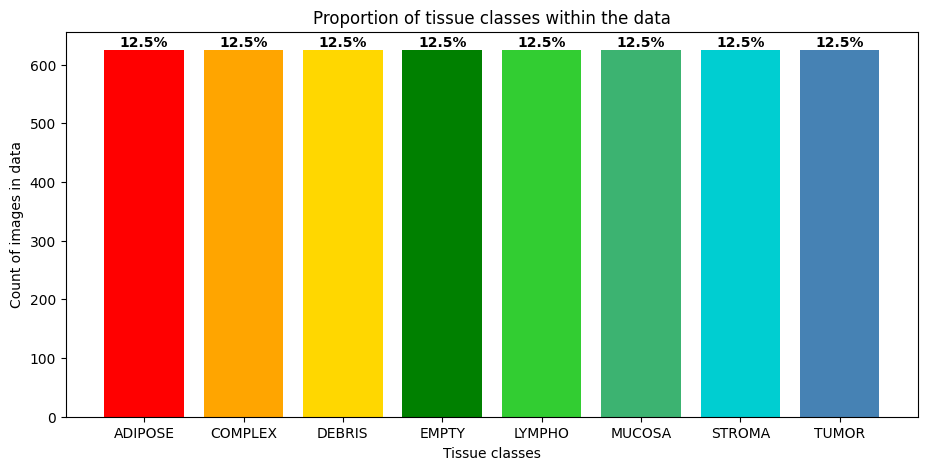

In [ ]:

sum_all = 5000

df_2['Percentage'] = ((100/ 5000) * 625)

colors_list=['Red', 'Orange', 'Gold', 'green', 'Limegreen', 'Mediumseagreen', 'Darkturquoise', 'Steelblue', 'Purple']

# depict illustration
plt.figure(figsize=(11,5))
#plt.figure(figsize=(8,8))
graph = plt.bar(df_2['cell_type'], df_2['count'], color = colors_list)
plt.axes
plt.ylabel("Count of images in data")
plt.xlabel("Tissue classes")
plt.title('Proportion of tissue classes within the data')

i = 0
for p in graph:
	width = p.get_width()
	height = p.get_height()
	x, y = p.get_xy()
	plt.text(x+width/2,
			y+height*1.01,
			str(df_2.Percentage[i])+'%',
			ha='center',
			weight='bold')
	i+=1
plt.show()


## Reading Tissue Images

Loading the images and giving insights on how they look like was done in this chapter.

In [ ]:
# read images from the data frame
df['image'] = df['path'].map(cv2.imread)

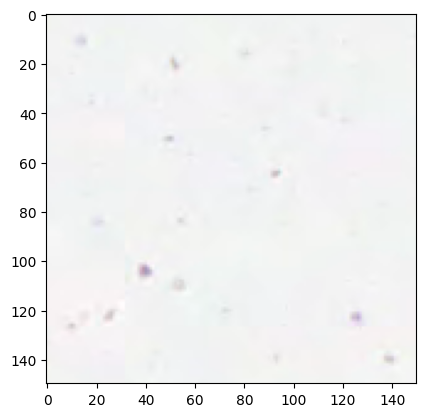

In [ ]:
# display the first image in the data frame
plt.imshow(df['image'][0])

In [ ]:
# check the dimensionality of the images
df['image'][0].shape

(150, 150, 3)

## Image intensity distributino per class
To get more information about how all eight tissue classes differentiate between each other, we printet the distribution of the intensitity in each image per class.

In [ ]:
# loading the CSV-file with the classes
images_intens = pd.read_csv('../VGG16/data/HTCP_28_28_RGB/HTCP_28_28_RGB.csv')
images_intens.head()

pixel0000  pixel0001  pixel0002  pixel0003  pixel0004  pixel0005  \
0        156         73        106        169         79        115   
1        139         33         55        139         32         58   
2        186         96        135        193        108        148   
3        139         50         84        158         55         93   
4        197        130        162        182        119        155   

   pixel0006  pixel0007  pixel0008  pixel0009  ...  pixel2343  pixel2344  \
0        199        131        161        190  ...        148         67   
1        143         35         52        159  ...        159         39   
2        176         91        137        189  ...        227        175   
3        185         61         88        188  ...        206         79   
4        171         93        135        181  ...        204        180   

   pixel2345  pixel2346  pixel2347  pixel2348  pixel2349  pixel2350  \
0        117        191        102        148        199        137   
1         65        155         38         59        148         38   
2        199        195        120        158        155         66   
3        110        160         48         73        117         34   
4        201        190        126        162        198        132   

   pixel2351  label  
0        172      2  
1         60      2  
2        108      2  
3         63      2  
4        165      2  

[5 rows x 2353 columns]

In [ ]:
# printing the size of the dataset
print("The data consists of {} samples".format(images_intens.shape[0]))

The data consists of 5000 samples


In [ ]:
# defining the class names and the colors we want to have in the visualisation
class_names = {1: "Tumor", 2: "Stroma", 3: "Complex", 4: "Lympho",
               5: "Debris", 6: "Mucosa", 7: "Adipose", 8: "Empty"}
class_colors = {1: "Red", 2: "Orange", 3: "Gold", 4: "Limegreen",
                5: "Mediumseagreen", 6: "Darkturquoise", 7: "Steelblue", 8: "Purple"}

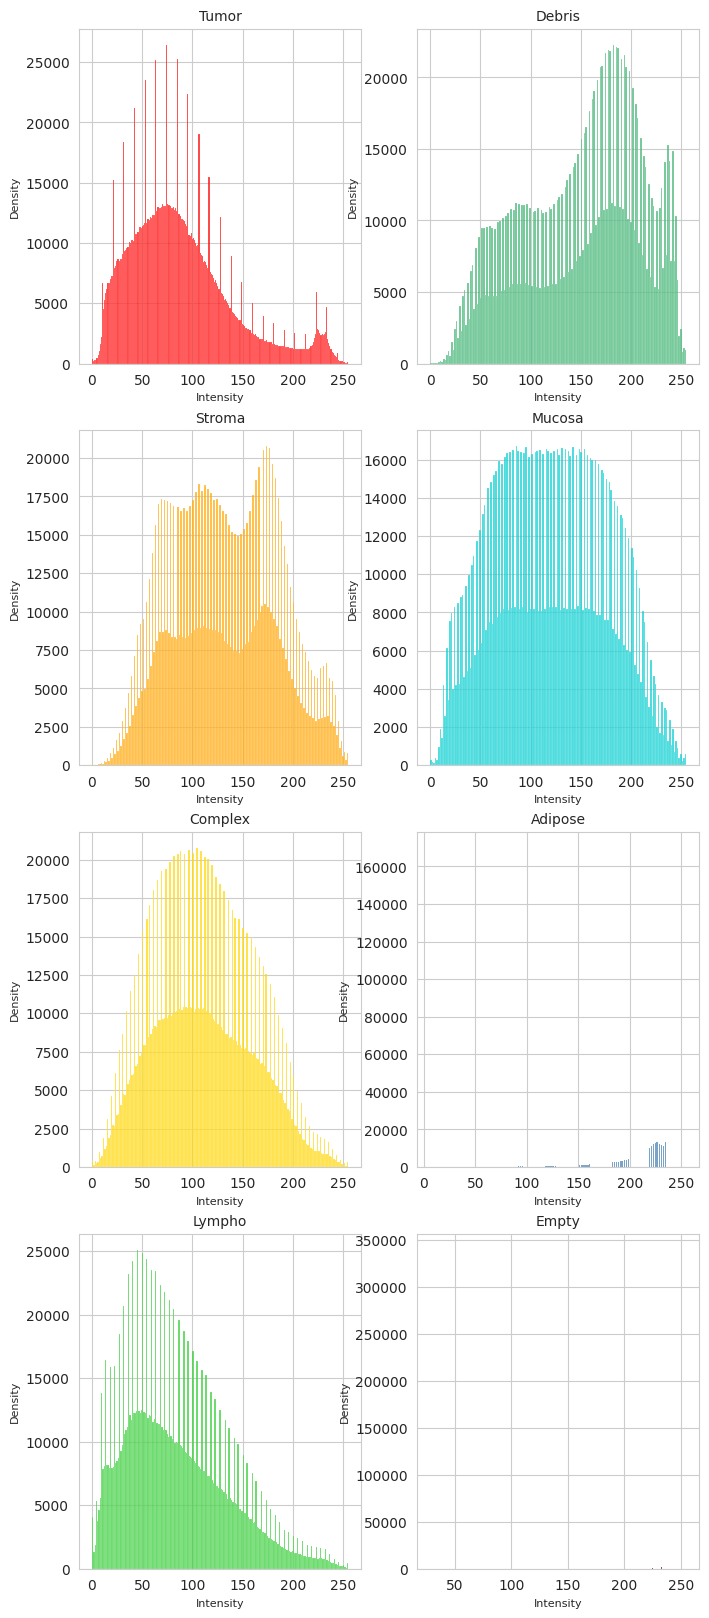

In [ ]:
# visualizing all classes with their intensitiy distribution
sns.set_style("whitegrid")
fig, ax = plt.subplots(4,2, figsize=(8,20))
for n in range(2):
    for m in range(4):
        class_idx = (m+1)+n*4
        sns.histplot(images_intens[images_intens.label == class_idx].drop("label", axis=1).values.flatten(), # or histplot?
                     ax=ax[m,n],
                     color=class_colors[class_idx])
        ax[m,n].set_title(class_names[class_idx], fontsize=10)
        ax[m,n].set_xlabel("Intensity", fontsize=8)
        ax[m,n].set_ylabel("Density", fontsize=8)

In [ ]:
# calculating the stats
from scipy import stats

def get_overall_statistics(data, cancer_class):
    class_intensities = data[data.label == cancer_class].values.flatten()
    class_stats = np.zeros(10)
    class_stats[0] = stats.mode(class_intensities, keepdims=True)[0][0]
    for q in range(1, 10):
        class_stats[q] = np.quantile(class_intensities, (q * 10)/100)
    return class_stats

stats_quantities = ["Mode", "Q10", "Q20", "Q30", "Q40", "Median", "Q60", "Q70", "Q80", "Q90"]
overall_statistics = pd.DataFrame(index = np.arange(1,9), columns=stats_quantities)
keepdims =True
for class_idx in range(1,9):
    overall_statistics.loc[class_idx,:] = get_overall_statistics(images_intens, class_idx)

overall_statistics = overall_statistics.reset_index()
overall_statistics["index"] = overall_statistics["index"].apply(lambda l : class_names[l])
overall_statistics = overall_statistics.set_index("index")
overall_statistics.index.name = None

In [ ]:
# saving the stats per class in a dataframe
image_statistics = pd.DataFrame(index=images_intens.index)
image_statistics["Mode"] = images_intens.apply(lambda l: stats.mode(l)[0][0], axis=1)
for q in range(1, 10):
    col_name = "Q" + str(q*10)
    image_statistics[col_name] = images_intens.apply(lambda l: np.quantile(l, (q*10)/100), axis=1)

image_statistics["label"] = images_intens.label.values
image_statistics.head()

<ipython-input-44-40fc06574cc7>:2: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  image_statistics["Mode"] = images_intens.apply(lambda l: stats.mode(l)[0][0], axis=1)


Mode   Q10    Q20    Q30    Q40    Q50    Q60    Q70    Q80    Q90  label
0   122  82.0  102.0  119.0  133.0  146.0  161.0  174.0  186.6  202.0      2
1    58  32.0   42.0   51.0   59.0   69.0   89.0  116.0  144.6  169.0      2
2   142  77.0   98.0  114.0  129.0  142.0  158.0  171.0  184.0  202.0      2
3    76  53.0   62.0   71.0   80.0   90.0  107.0  149.0  176.0  190.8      2
4   169  86.2  105.0  120.0  134.0  147.0  162.0  174.0  185.0  198.0      2

In [ ]:
your_choice = ["Mode"]

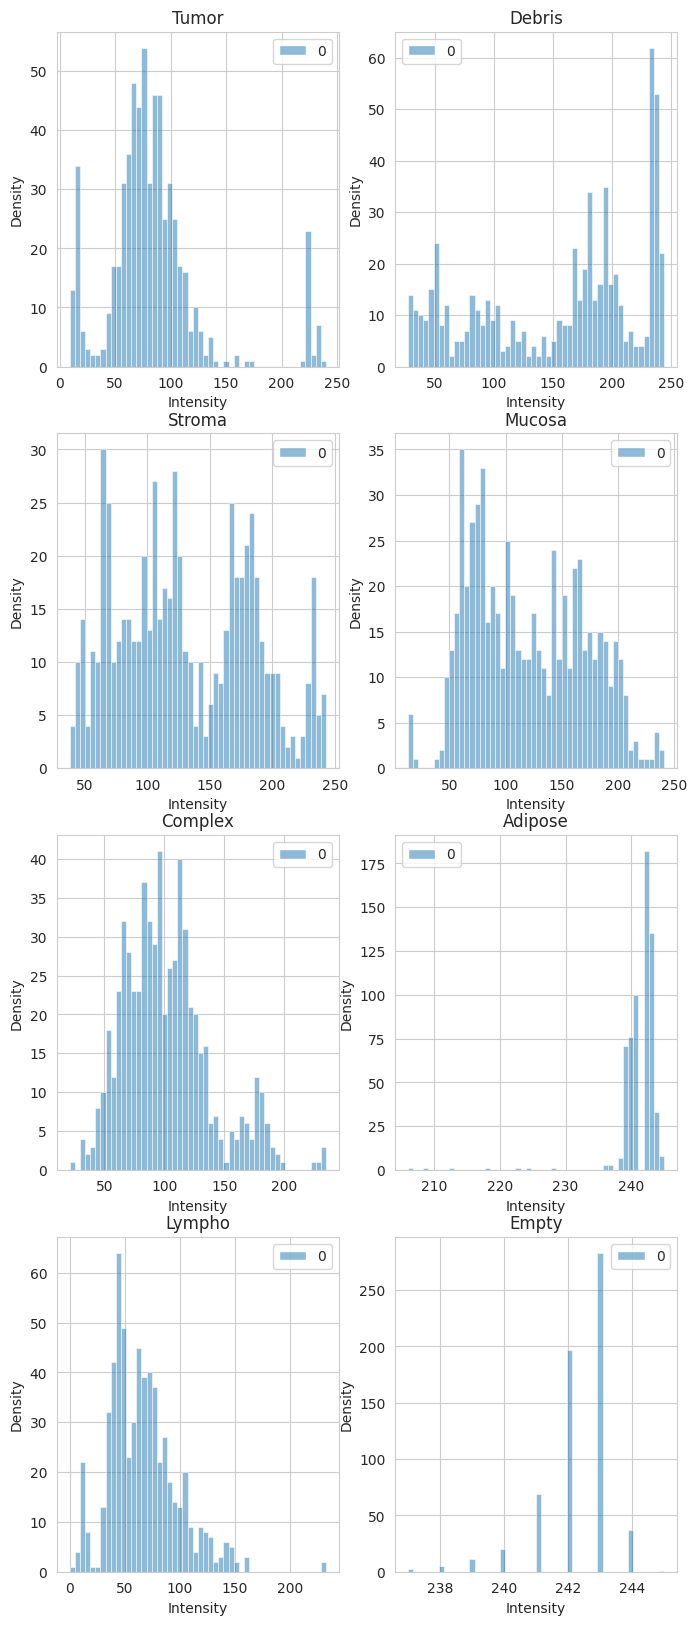

In [ ]:
# visualizing the stats in histplots
sns.set_style("whitegrid")
fig, ax = plt.subplots(4,2 , figsize=(8,20))
for n in range(2):
    for m in range(4):
        class_idx = (m+1)+n*4
        sns.histplot(image_statistics[image_statistics.label == class_idx][your_choice].values,
                     ax=ax[m,n],
                     color="lightskyblue",
                     #norm_hist=True, 
                     bins=50)
        ax[m,n].set_title(class_names[class_idx])
        ax[m,n].set_xlabel("Intensity")
        ax[m,n].set_ylabel("Density")


## Preparing Data

After the data exploration, the images needed to be prepared, so that further steps as defining a model was possible. Therefore the pixels get normalized, the data shuffeled and the labels one-hot-encoded.

In [ ]:
# normalize the images and cast integers to floats
def normalize(input_image):
    input_image = tf.cast(input_image, tf.float32) / 255.0
    return input_image

df['image_processed'] = df['image'].apply(lambda x: normalize(x))

In [ ]:
# check the result of the normalization
df['image_processed'][0]

<tf.Tensor: shape=(150, 150, 3), dtype=float32, numpy=
array([[[0.9490196 , 0.9529412 , 0.9372549 ],
        [0.9490196 , 0.9529412 , 0.9372549 ],
        [0.9529412 , 0.95686275, 0.9490196 ],
        ...,
        [0.9411765 , 0.9490196 , 0.9490196 ],
        [0.9372549 , 0.94509804, 0.94509804],
        [0.9490196 , 0.95686275, 0.95686275]],

       [[0.9490196 , 0.9529412 , 0.9372549 ],
        [0.9490196 , 0.9529412 , 0.9372549 ],
        [0.9490196 , 0.9529412 , 0.94509804],
        ...,
        [0.9411765 , 0.9490196 , 0.9490196 ],
        [0.9411765 , 0.9490196 , 0.9490196 ],
        [0.9490196 , 0.95686275, 0.95686275]],

       [[0.9490196 , 0.9529412 , 0.9372549 ],
        [0.9490196 , 0.9529412 , 0.9372549 ],
        [0.9490196 , 0.9529412 , 0.94509804],
        ...,
        [0.94509804, 0.9529412 , 0.9529412 ],
        [0.94509804, 0.9529412 , 0.9529412 ],
        [0.9490196 , 0.95686275, 0.95686275]],

       ...,

       [[0.9529412 , 0.95686275, 0.9411765 ],
        [0.95

In [ ]:
# shuffle the data randomly
rows = df.index.values
random.shuffle(rows)

# re-index dataframe
df = df.reindex(rows)
df.sort_index(inplace=True)

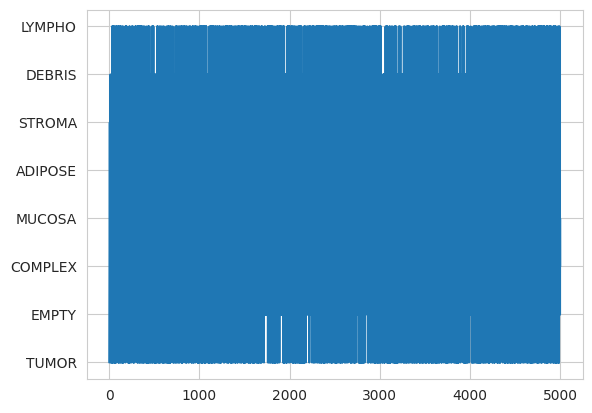

In [ ]:
# check how the data is ordered according to the tissue classes
plt.plot(df.index, df['cell_type'])
plt.show()

In [ ]:
# check the result of the shuffling based on the row index
print(rows)

[3509 3208 2577 ... 3602 3705 3250]


In [ ]:
# one-hot encode the labels of the tissue classes
labels = pd.get_dummies(df['cell_type'])
labels.head()

ADIPOSE  COMPLEX  DEBRIS  EMPTY  LYMPHO  MUCOSA  STROMA  TUMOR
0        0        0       0      0       0       0       0      1
1        0        0       0      1       0       0       0      0
2        0        1       0      0       0       0       0      0
3        0        0       0      0       0       1       0      0
4        1        0       0      0       0       0       0      0

In [ ]:
# transform images to a numpy-array
data = np.array(df['image_processed'].tolist())

In [ ]:
# create training, test and validation datasets
x, x_test, y, y_test = train_test_split(data, labels, test_size=0.2,train_size=0.8)
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = 0.25,train_size =0.75)

In [ ]:
# check dimensions of datasets
print('1- Training set:', x_train.shape, y_train.shape)
print('2- Validation set:', x_val.shape, y_val.shape)
print('3- Testing set:', x_test.shape, y_test.shape)

1- Training set: (3000, 150, 150, 3) (3000, 8)
2- Validation set: (1000, 150, 150, 3) (1000, 8)
3- Testing set: (1000, 150, 150, 3) (1000, 8)


In [ ]:
print(data)

[[[[0.53333336 0.34509805 0.59607846]
   [0.60784316 0.46666667 0.7254902 ]
   [0.5294118  0.3882353  0.64705884]
   ...
   [0.30588236 0.14117648 0.39607844]
   [0.32156864 0.15686275 0.4117647 ]
   [0.3764706  0.19607843 0.47843137]]

  [[0.61960787 0.43529412 0.6392157 ]
   [0.6156863  0.5176471  0.78431374]
   [0.48235294 0.38431373 0.6509804 ]
   ...
   [0.29411766 0.13333334 0.37254903]
   [0.29411766 0.13333334 0.37254903]
   [0.37254903 0.2        0.45882353]]

  [[0.61960787 0.45490196 0.73333335]
   [0.5411765  0.43137255 0.7019608 ]
   [0.36862746 0.25882354 0.5294118 ]
   ...
   [0.27058825 0.10980392 0.34901962]
   [0.27450982 0.11372549 0.3529412 ]
   [0.32941177 0.15686275 0.41960785]]

  ...

  [[0.41568628 0.24313726 0.59607846]
   [0.43137255 0.26666668 0.6313726 ]
   [0.4392157  0.27450982 0.6392157 ]
   ...
   [0.6392157  0.5294118  0.64705884]
   [0.42352942 0.3137255  0.43137255]
   [0.31764707 0.18039216 0.4       ]]

  [[0.43137255 0.25882354 0.6117647 ]
   [0.4

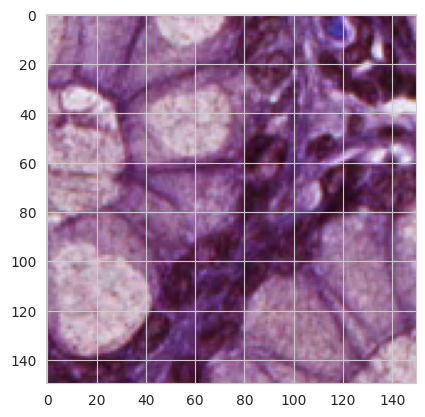

In [ ]:
# display the first image in the data frame
plt.imshow(df['image'][3])

## Saving Data
To simplyfy working with the data, we saved all splits into single npy-files.

In [ ]:
# save the datasets as pickles
np.save('../VGG16/data/preprocessed_data/tissue_classification/x_train', x_train)
np.save('../VGG16/data/preprocessed_data/tissue_classification/x_test.npy', x_test)
np.save('../VGG16/data/preprocessed_data/tissue_classification/x_val', x_val)
np.save('../VGG16/data/preprocessed_data/tissue_classification/y_train', y_train)
np.save('../VGG16/data/preprocessed_data/tissue_classification/y_test', y_test)
np.save('../VGG16/data/preprocessed_data/tissue_classification/y_val', y_val)